In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/module_5_auto.csv'
df = pd.read_csv(path)
df.head()

,Unnamed: 0,Unnamed: 0.1,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,0,0,3,122,alfa-romero,std,two,convertible,rwd,front,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,1,1,3,122,alfa-romero,std,two,convertible,rwd,front,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,2,2,1,122,alfa-romero,std,two,hatchback,rwd,front,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,3,3,2,164,audi,std,four,sedan,fwd,front,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,4,4,2,164,audi,std,four,sedan,4wd,front,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [3]:
df.to_csv('model_5_auto.csv')

In [4]:
df = df._get_numeric_data()
df.head()

,Unnamed: 0,Unnamed: 0.1,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,...,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
0,0,0,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,0,1
1,1,1,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,0,1
2,2,2,1,122,94.5,0.822681,0.909722,52.4,2823,152,...,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,0,1
3,3,3,2,164,99.8,0.848630,0.919444,54.3,2337,109,...,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,0,1
4,4,4,2,164,99.4,0.848630,0.922222,54.3,2824,136,...,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,0,1


In [5]:
from ipywidgets import interact, interactive, fixed, interact_manual

# Functions for plotting

In [6]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width,height))
    
    ax1 = sns.distplot(RedFunction, hist = False, color='r', label = RedName)
    ax2 = sns.distplot(BlueFunction, hist = False, color = 'b', label = BlueName)
    
    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')
    
    plt.show()
    plt.close() 

In [7]:
def PollyPlot(xtrain, xtest, y_train, y_test, lr, poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width,height))
    
    #training data
    #testing data
    #lr: linear regression object
    #poly_transform: polynomial transformation object
    
    xmax = max([xtrain.values.max(), xtest.values.max()])
    xmin = min([xtrain.values.min(), xtest.values.min()])
    x = np.arange(xmin, xmax, 0.1)
    
    plt.plot(xtrain, y_train, 'ro',label='Training Data')
    plt.plot(xtest,y_test, 'go', label = 'Test Data')
    plt.plot(x,lr.predict(poly_transform.fit_transform(x.reshape(-1,1))),label = 'Predicted Function')
    plt.ylim([-10000,60000])
    plt.ylabel('Price')
    plt.legend()

# Training and Testing

In [8]:
y_data = df['price']

In [9]:
x_data = df.drop('price',axis=1)

In [10]:
#split dataset
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.1,random_state = 1)

print("number of test samples:",x_test.shape[0])
print("number of training samples:",x_train.shape[0])


number of test samples: 21
number of training samples: 180


In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
lre = LinearRegression()

In [13]:
lre.fit(x_train[['horsepower']],y_train)

LinearRegression()

In [14]:
lre.score(x_test[['horsepower']],y_test)

0.3635875575078824

In [15]:
lre.score(x_train[['horsepower']],y_train)

0.6619724197515103

Cross-Vlidation Score

In [16]:
from sklearn.model_selection import cross_val_score

In [17]:
Rcross = cross_val_score(lre,x_data[['horsepower']], y_data, cv=5)
Rcross

array([ 0.73769851,  0.55987071, -0.08045406,  0.87716741, -0.16234087])

In [18]:
print('The mean of the folds are', Rcross.mean(), "and the standard deviation is ",Rcross.std())

The mean of the folds are 0.38638834118725535 and the standard deviation is  0.42741657314064685


In [19]:
from sklearn.model_selection import cross_val_predict

In [20]:
yhat = cross_val_predict(lre,x_data[['horsepower']],y_data, cv=4)
yhat[0:5]

array([14141.63807508, 14141.63807508, 20814.29423473, 12745.03562306,
       14762.35027598])

# Overfitting,Underfitting and Model Selection

In [21]:
lr = LinearRegression()
lr.fit(x_train[['horsepower','curb-weight','engine-size','highway-mpg']], y_train)

LinearRegression()

In [22]:
yhat_train = lr.predict(x_train[['horsepower','curb-weight','engine-size','highway-mpg']])
yhat_train[0:5]

array([ 7426.6731551 , 28323.75090803, 14213.38819709,  4052.34146983,
       34500.19124244])

In [23]:
yhat_train = lr.predict(x_test[['horsepower','curb-weight','engine-size','highway-mpg']])
yhat_train[0:5]

array([11349.35089149,  5884.11059106, 11208.6928275 ,  6641.07786278,
       15565.79920282])

In [24]:
yhat_test = lr.predict(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_test[0:5]

array([11349.35089149,  5884.11059106, 11208.6928275 ,  6641.07786278,
       15565.79920282])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


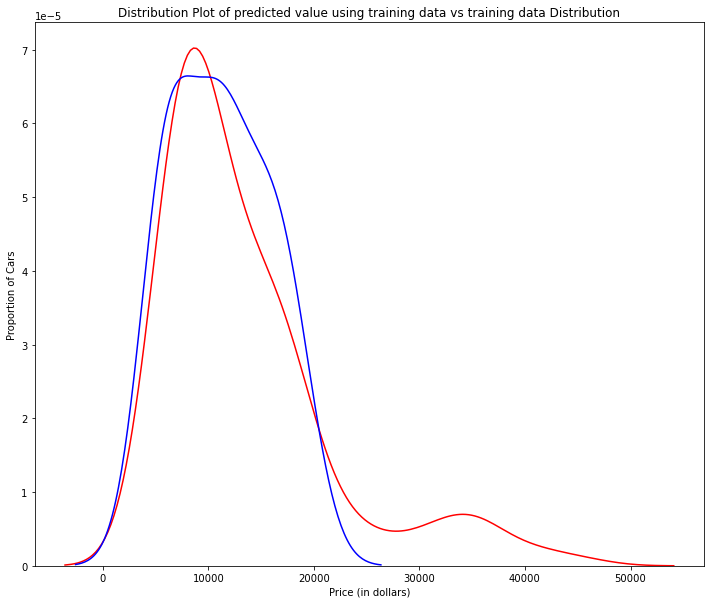

In [25]:
Title = 'Distribution Plot of predicted value using training data vs training data Distribution'
DistributionPlot(y_train, yhat_train, "Actual Values(train)","Predicted Values (Train)", Title)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


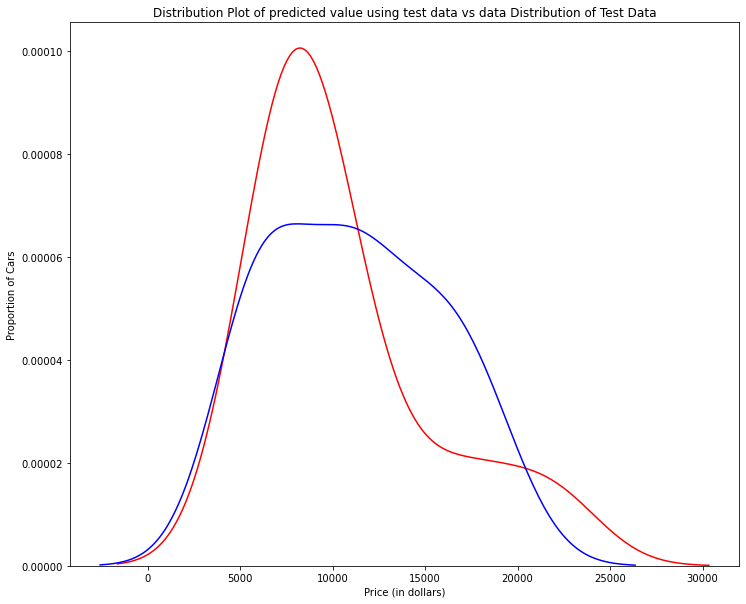

In [26]:
Title = 'Distribution Plot of predicted value using test data vs data Distribution of Test Data'
DistributionPlot(y_test, yhat_test, "Actual Values(Test)","Predicted Values (Test)",Title)

In [27]:
from sklearn.preprocessing import PolynomialFeatures

In [28]:
pr = PolynomialFeatures(degree=5)
x_train_pr = pr.fit_transform(x_train[['horsepower']])
x_test_pr = pr.fit_transform(x_test[['horsepower']])


In [29]:
poly = LinearRegression()
poly.fit(x_train_pr,y_train)


LinearRegression()

In [30]:
hyat = poly.predict(x_test_pr)
yhat[0:5]

array([14141.63807508, 14141.63807508, 20814.29423473, 12745.03562306,
       14762.35027598])

In [31]:
print("Predicted values :",yhat[0:4])
print("True values :",y_test[0:4].values)

Predicted values : [14141.63807508 14141.63807508 20814.29423473 12745.03562306]
True values : [ 9549.  6229. 10245.  7295.]


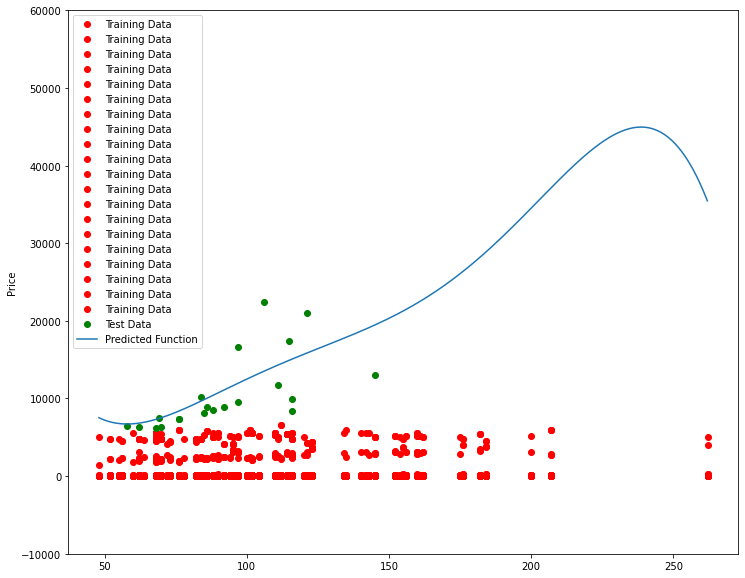

In [32]:
PollyPlot(x_train[['horsepower']],x_test[['horsepower']],x_train, y_test, poly, pr)

In [33]:
poly.score(x_train_pr, y_train)

0.68152827637179

In [34]:
poly.score(x_test_pr,y_test)

0.40307262962503054

# Ridge Regression

In [35]:
pr = PolynomialFeatures(degree = 2)
x_train_pr = pr.fit_transform(x_train[['horsepower','curb-weight','engine-size','highway-mpg','normalized-losses','symboling']])
x_test_pr = pr.fit_transform(x_test[['horsepower','curb-weight','engine-size','highway-mpg','normalized-losses','symboling']])


In [36]:
from sklearn.linear_model import Ridge

In [37]:
RigeModel = Ridge(alpha=1)

In [38]:
RigeModel.fit(x_train_pr,y_train)

Ridge(alpha=1)

In [39]:
print('predicted:',yhat[0:4])
print('test set :',y_test[0:4].values)

predicted: [14141.63807508 14141.63807508 20814.29423473 12745.03562306]
test set : [ 9549.  6229. 10245.  7295.]


We select the value of alpha that minimizes the test error. To do so, we can use a for loop .We have also created a progress bat to see how many iterations we have completed fo far.

In [43]:
from tqdm import tqdm

Rsqu_test = []
Rsqu_train = []
dummy1 = []
Alpha = 10 * np.array(range(0,1000))
pbar = tqdm(Alpha)

for alpha in pbar:
    RigeModel = Ridge(alpha=alpha)
    RigeModel.fit(x_train_pr, y_train)
    test_score, train_score = RigeModel.score(x_test_pr,y_test), RigeModel.score(x_train_pr, y_train)
    
    pbar.set_postfix({'test score ':test_score,'train score':train_score})
    
    Rsqu_test.append(test_score)
    Rsqu_train.append(train_score)

100%|██████████| 1000/1000 [00:08<00:00, 117.45it/s, test score =0.682, train score=0.858]


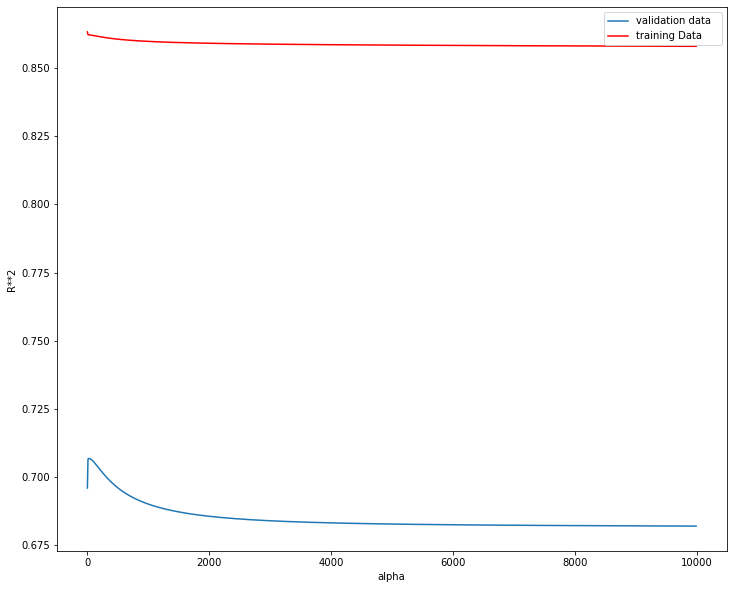

In [45]:
#We can plot out the value of R**2 for different alphas

width = 12
height = 10
plt.figure(figsize = (width,height))

plt.plot(Alpha,Rsqu_test, label='validation data  ')
plt.plot(Alpha,Rsqu_train, 'r', label='training Data ')
plt.xlabel('alpha')
plt.ylabel('R**2')
plt.legend()

# Grid Search

In [46]:
from sklearn.model_selection import GridSearchCV

In [47]:
parameters1= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]
parameters1

[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000]}]

In [48]:
#Create a Ridge regression object
RR=Ridge()
RR

Ridge()

In [49]:
#Create a Ridge grid search object
Grid1 = GridSearchCV(RR, parameters1,cv=4)

In [50]:
Grid1.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_data)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000,
                                    100000]}])

In [51]:
BestRR=Grid1.best_estimator_
BestRR

Ridge(alpha=10000)

In [52]:
BestRR.score(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_test)

0.6373308904159389